#  Загрузка предобученных эмбеддингов

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://rusvectores.org/
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* https://github.com/natasha/navec
* https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

## Задачи для совместного разбора

1\. Создайте объект `nn.Embedding` на основе файла `ruscorpora_upos_skipgram_300_5_2018_sample.vec`.

In [ ]:
import torch as th

In [ ]:
embeddings = {}
index = {}
with open('ruscorpora_upos_skipgram_300_5_2018_sample.vec', 'r', encoding='utf8') as fp:
  fp.readline()
  for idx, line in enumerate(fp):
    word_pos, v = line.split(' ', maxsplit=1)
    word, pos = word_pos.split('_')
    v = [float(x) for x in v.split()]
    embeddings[(word, pos)] = v
    index[(word, pos)] = idx

In [ ]:
len(embeddings)

4

In [ ]:
embeddings_t = th.Tensor(list(embeddings.values()))

In [ ]:
word = 'человек'
pos = 'NOUN'

In [ ]:
embeddings_t[index[(word, pos)]][:10]

tensor([-0.0611,  0.0601,  0.0791, -0.0341,  0.1137,  0.0552,  0.0128, -0.0248,
        -0.0794, -0.0286])

In [ ]:
import torch.nn as nn

In [ ]:
e = nn.Embedding(num_embeddings=4, embedding_dim=300)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Воспользовавшись предобученными эмбеддингами [ruscorpora_upos_skipgram_300_5_2018](https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz), создайте словарь, где ключом является кортеж из слова и части речи, а значением - номер этого слова в файле эмбеддингами (первую строку при расчете номера строк не учитывайте). Выведите на экран количество элементов в словаре. Создайте двумерный массив эмбеддингов и выведите на экран его форму.

- [ ] Проверено на семинаре

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
embeddings = {}
index = {}
with open('drive/MyDrive/NLP/ruscorpora_upos_skipgram_300_5_2018.vec', 'r', encoding='utf8') as fp:
  fp.readline()
  for idx, line in enumerate(fp):
    word_pos, v = line.split(' ', maxsplit=1)
    word, pos = word_pos.split('_')
    v = [float(x) for x in v.split()]
    embeddings[(word, pos)] = v
    index[(word, pos)] = idx

In [ ]:
len(embeddings)

195071

In [ ]:
embeddings_t = th.Tensor(list(embeddings.values()))

In [ ]:
embeddings_t.shape

torch.Size([195071, 300])

<p class="task" id="2"></p>

2\. Используя PCA, уменьшите размерность загруженных эмбеддингов до 2. Визуализируйте на плоскости точки для слов "кот", "кошка", "собака", "киса", "овчарка", "студент", "препод". Добавьте для точек подписи.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
embeddings_t_2 = pca.fit_transform(embeddings_t)

In [ ]:
embeddings_t_2.shape

(195071, 2)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
cat_m = index[('кот', 'NOUN')]
cat_f = index[('кошка', 'NOUN')]
dog = index[('собака', 'NOUN')]
kisa = index[('киса', 'NOUN')]
ovch = index[('овчарка', 'NOUN')]
student = index[('студент', 'NOUN')]
prof = index[('препод', 'NOUN')]
indices = [cat_m, cat_f, dog, kisa, ovch, student, prof]

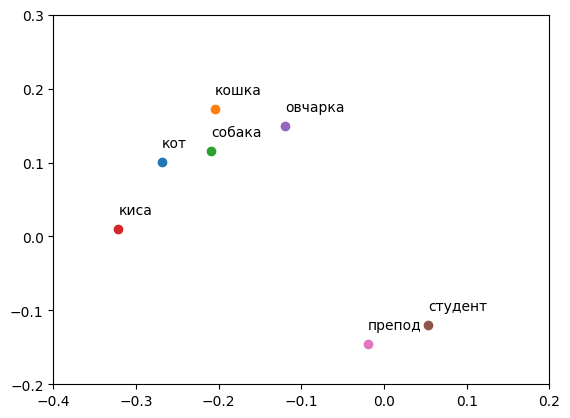

In [ ]:
text = ['кот', 'кошка', 'собака','киса', 'овчарка','студент', 'препод']
i = 0
for ind in indices:
    x = embeddings_t_2[ind][0]
    y = embeddings_t_2[ind][1]
    plt.scatter(x, y)
    plt.annotate(text[i], (x, y + 0.02))
    i += 1

plt.xlim([-0.4, 0.2])
plt.ylim([-0.2, 0.3]);

<p class="task" id="3"></p>

3\. Напишите функцию, которая для заданного слова `word` находит `k` ближайших слов в смысле евклидова расстояния между эмбеддингами. Продемонстрируйте работу функции на словах из предыдущего задания.

- [ ] Проверено на семинаре

In [ ]:
from numpy.linalg import norm
import numpy as np

In [ ]:
def euc_distance(word, k):
    distances = []
    for key, v in embeddings.items():
        if key[0] == word:
            word_vec = v
            break
    for key, v in embeddings.items():
        if key[0] == word:
            continue
        dist = norm(np.array(word_vec) - np.array(v))
        distances.append((dist, key[0]))
    distances = sorted(distances, key=lambda x: x[0])[:k]
    return [dist[1] for dist in distances]

In [ ]:
euc_distance('кот', k=5)

['кошка', 'котенок', 'рыбалкин', 'кота', 'клеточка']

In [ ]:
euc_distance('кошка', k=5)

['кот', 'собака', 'котенок', 'мяукать', 'мяукать']

In [ ]:
euc_distance('собака', k=5)

['пес', 'кошка', 'овчарка', 'собачка', 'собачонка']

In [ ]:
euc_distance('киса', k=5)

['оборин', 'кабюс', 'памухин', 'худоля', 'настюх']

In [ ]:
euc_distance('овчарка', k=5)

['пес', 'собака', 'дворняга', 'волкодав', 'дог']

In [ ]:
euc_distance('студент', k=5)

['аспирант', 'преподаватель', 'студентка', 'заочник', 'университет']

In [ ]:
euc_distance('препод', k=5)

['иняз', 'дубенко', 'преподаватель', 'иврит', 'политграмота']

<p class="task" id="4"></p>

4\. Создайте слой `nn.Embedding` на основе загруженных эмбеддингов. Для каждого слова из задания 2 найдите соотетствующий ему индекс. Используя найденные индексы, получите для каждого слова его векторное представление. Выведите форму полученного тензора.

- [ ] Проверено на семинаре

In [ ]:
import torch.nn as nn

In [ ]:
e = nn.Embedding.from_pretrained(embeddings_t)

In [ ]:
e.weight.shape

torch.Size([195071, 300])

In [ ]:
cat_m = index[('кот', 'NOUN')]
cat_f = index[('кошка', 'NOUN')]
dog = index[('собака', 'NOUN')]
kisa = index[('киса', 'NOUN')]
ovch = index[('овчарка', 'NOUN')]
student = index[('студент', 'NOUN')]
prof = index[('препод', 'NOUN')]
indices = [cat_m, cat_f, dog, kisa, ovch, student, prof]

In [ ]:
vecs = e(th.tensor(indices))

In [ ]:
vecs.shape

torch.Size([7, 300])

<p class="task" id="5"></p>

5\. Создайте новый вариант `nn.Embedding`, где для нулевого индекса возвращается тензор из нулей, а для первого индекса возвращается тензор из чисел $\frac{1}{300}$. Выведите на экран размер количество эмбеддингов и эмбеддинги для индексов 0 и 1.

- [ ] Проверено на семинаре

In [ ]:
e_ = nn.Embedding.from_pretrained(embeddings_t)

In [ ]:
e_6 = th.vstack([
    th.zeros(size=(1, embeddings_t.shape[1])),
    th.ones(size=(1, embeddings_t.shape[1])) / 300,
    embeddings_t
])
e_6_ = nn.Embedding.from_pretrained(e_6)

In [ ]:
e_6_.weight.shape

torch.Size([195073, 300])

In [ ]:
e_6_(th.tensor([0]))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
e_6_(th.tensor([1]))

tensor([[0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0

<p class="task" id="6"></p>

6\. Для каждого слова в каждом предложении батча получите его индекс. При поиске индекса слова приводите слово к нормальной форме. Части речи для простоты можно не учитывать. В случае отсутствия слова в словаре используйте индекс 1. Дополните все наборы индексов до одного размера индексом 0. Используя найденные индексы, получите для каждого слова в каждом предложении его векторное представление. Выведите форму полученного тензора.

Получите векторное представление каждого предложения путем усреднения эмбеддингов слов этого предложения. Выведите форму результата на экран.

- [ ] Проверено на семинаре

In [ ]:
sents = [
    "робот пылесос только что опередил меня и сожрал попкорнину которую я хотел поднять",
    "я приходил к хирургу он мне предложил отрезать ухо"
]

In [ ]:
pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=c03938d8a44215df6d9511653577cb39a7bc405dd993367fdd0bec56c44b7236
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
from nltk import word_tokenize

In [ ]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sent_indices = []
for sent in sents:
    ind = 0
    word_indices = []
    for word in word_tokenize(sent.lower()):
        word = morph.parse(word)[0].normal_form
        word_indices.append(1)
        for k, v in index.items():
            if k[0] == word:
                word_indices[ind] = v + 2
                break
        ind += 1
    sent_indices.append(word_indices)

In [ ]:
sent_indices

[[8123, 18360, 1, 1, 20371, 77782, 1, 18829, 1, 1, 77782, 31, 5660],
 [77782, 49, 1, 5943, 1, 77782, 10399, 3655, 586]]

In [ ]:
max_length = max(len(sent) for sent in sent_indices)
for i in range(len(sent_indices)):
    zer = [0] * (max_length - len(sent_indices[i]))
    sent_indices[i].extend(zer)

In [ ]:
sent_indices

[[8123, 18360, 1, 1, 20371, 77782, 1, 18829, 1, 1, 77782, 31, 5660],
 [77782, 49, 1, 5943, 1, 77782, 10399, 3655, 586, 0, 0, 0, 0]]

In [ ]:
ans = e_6_(th.tensor(sent_indices))
ans.shape

torch.Size([2, 13, 300])

In [ ]:
import numpy as np

In [ ]:
sent_emb = []
for sent in sents:
    ind = 0
    word_emb = []
    for word in word_tokenize(sent.lower()):
        word = morph.parse(word)[0].normal_form
        word_emb.append(1)
        for k, v in embeddings.items():
            if k[0] == word:
                word_emb[ind] = np.mean(v)
                break
        ind += 1
    sent_emb.append(word_emb)

In [ ]:
max_length = max(len(sent) for sent in sent_emb)
for i in range(len(sent_emb)):
    zer = [0] * (max_length - len(sent_emb[i]))
    sent_emb[i].extend(zer)

In [ ]:
ans2 = th.tensor(sent_emb)
ans2.shape

torch.Size([2, 13])

<p class="task" id="7"></p>

7\. Загрузите модель [navec_hudlit_v1_12B_500K_300d_100q.tar](https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar) с помощью пакета `navec`. Для каждого слова в каждом предложении батча получите его индекс. При поиске индекса слова приводите слово к нормальной форме. В случае отсутствия слова в словаре используйте индекс токена `<unk>`. Дополните все наборы индексов до одного размера индексом токена `<pad>`. Используя найденные индексы, получите для каждого слова в каждом предложении его векторное представление.  Выведите форму полученного тензора.

- [ ] Проверено на семинаре

In [ ]:
sents = [
    "робот пылесос только что опередил меня и сожрал попкорнину которую я хотел поднять",
    "я приходил к хирургу он мне предложил отрезать ухо"
]

In [ ]:
!pip install navec

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2023-10-17 17:49:11--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  15.2MB/s    in 5.3s    

2023-10-17 17:49:18 (9.61 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [ ]:
from navec import Navec

path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [ ]:
sent_indices = []
for sent in sents:
    ind = 0
    word_indices = []
    for word in word_tokenize(sent.lower()):
        word = morph.parse(word)[0].normal_form
        try:
            word_indices.append(navec.vocab[word])
        except KeyError:
            word_indices.append(navec.vocab['<unk>'])
    sent_indices.append(word_indices)

In [ ]:
max_length = max(len(sent) for sent in sent_indices)
for i in range(len(sent_indices)):
    zer = [navec.vocab['<pad>']] * (max_length - len(sent_indices[i]))
    sent_indices[i].extend(zer)

In [ ]:
!pip install slovnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.2 MB/s eta 0:00:00


In [ ]:
from slovnet.model.emb import NavecEmbedding

emb = NavecEmbedding(navec)
output = emb(th.tensor(sent_indices))
output.shape

torch.Size([2, 13, 300])

## Обратная связь
- [x] Хочу получить обратную связь по решению